In [1]:
# Importing Necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Collection and pre-processing

In [2]:
# Data collection from csv file.
data=pd.read_csv(r"C:\Users\91749\Downloads\Car Price Dataset\Car Price\CarPrice.csv")

In [3]:
data.head()

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
0,Mahindra Xuv500 (2013),W8 Dual Tone,DIESEL,"58,000 KM",MANUAL,1st Owner,"Pitampura, Delhi",01/27/2022,435000
1,Hyundai Creta (2020),1.6 SX Option Executive Diesel,DIESEL,43861.0 KM,MANUAL,1st Owner,"Ahiritola, Kolkata",01/23/2022,1165101
2,Hyundai Verna (2019),VTVT 1.4 EX,PETROL,"17,000 KM",MANUAL,2nd Owner,"Chelavoor, Pantheeramkavu",01/25/2022,815000
3,Datsun Redigo (2020),D,PETROL,10000 KM,MANUAL,1st Owner,"Palam, Delhi",01/13/2022,270000
4,Hyundai I10 (2011),Sportz 1.1 iRDE2,PETROL,70000 KM,MANUAL,1st Owner,"Dwarka Sector 13, Delhi",01/13/2022,185000


In [4]:
# Shape of dataset.
data.shape

(5050, 9)

The dataset contains 5050 rows and 9 columns.

In [5]:
# Checking the data types of columns.
data.dtypes

Brand & Model         object
Varient               object
Fuel Type             object
Driven Kilometers     object
Transmission          object
Owner                 object
Location              object
Date of Posting Ad    object
Price (in ₹)           int64
dtype: object

In [6]:
# Checking total columns in dataset.
data.columns

Index(['Brand & Model', 'Varient', 'Fuel Type', 'Driven Kilometers',
       'Transmission', 'Owner', 'Location', 'Date of Posting Ad',
       'Price (in ₹)'],
      dtype='object')

In [7]:
# Checking the null values in dataset.
data.isnull().sum()

Brand & Model          0
Varient               39
Fuel Type              0
Driven Kilometers      0
Transmission           0
Owner                  0
Location               0
Date of Posting Ad     0
Price (in ₹)           0
dtype: int64

Only the varient column contains null values.

<AxesSubplot:>

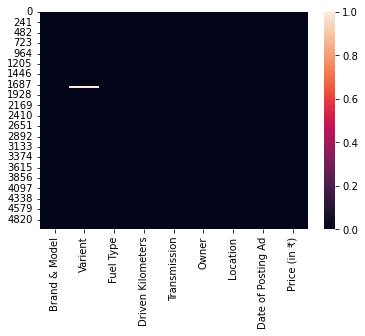

In [8]:
# Visualizing null values using heatmap for better understanding.
sns.heatmap(data.isnull())

In [9]:
# Handling the null values using mode imputation as column is categorical.

data["Varient"] = data["Varient"].fillna(data["Varient"].mode()[0])

In [10]:
# Checking the null values after handling.
data.isnull().sum()

Brand & Model         0
Varient               0
Fuel Type             0
Driven Kilometers     0
Transmission          0
Owner                 0
Location              0
Date of Posting Ad    0
Price (in ₹)          0
dtype: int64

Here we can see their is no null value present after handling them.

In [11]:
# Checking the dataset summary.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand & Model       5050 non-null   object
 1   Varient             5050 non-null   object
 2   Fuel Type           5050 non-null   object
 3   Driven Kilometers   5050 non-null   object
 4   Transmission        5050 non-null   object
 5   Owner               5050 non-null   object
 6   Location            5050 non-null   object
 7   Date of Posting Ad  5050 non-null   object
 8   Price (in ₹)        5050 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 355.2+ KB


# Exploratory Data Analysis

<AxesSubplot:xlabel='Price (in ₹)', ylabel='Density'>

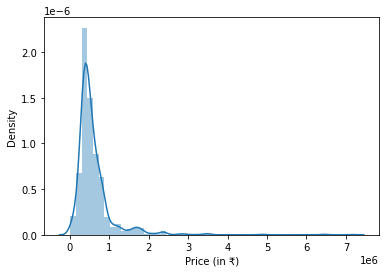

In [12]:
# Visualizing price column using Distplot.
sns.distplot(data['Price (in ₹)'])

Here the target column shows normal trend

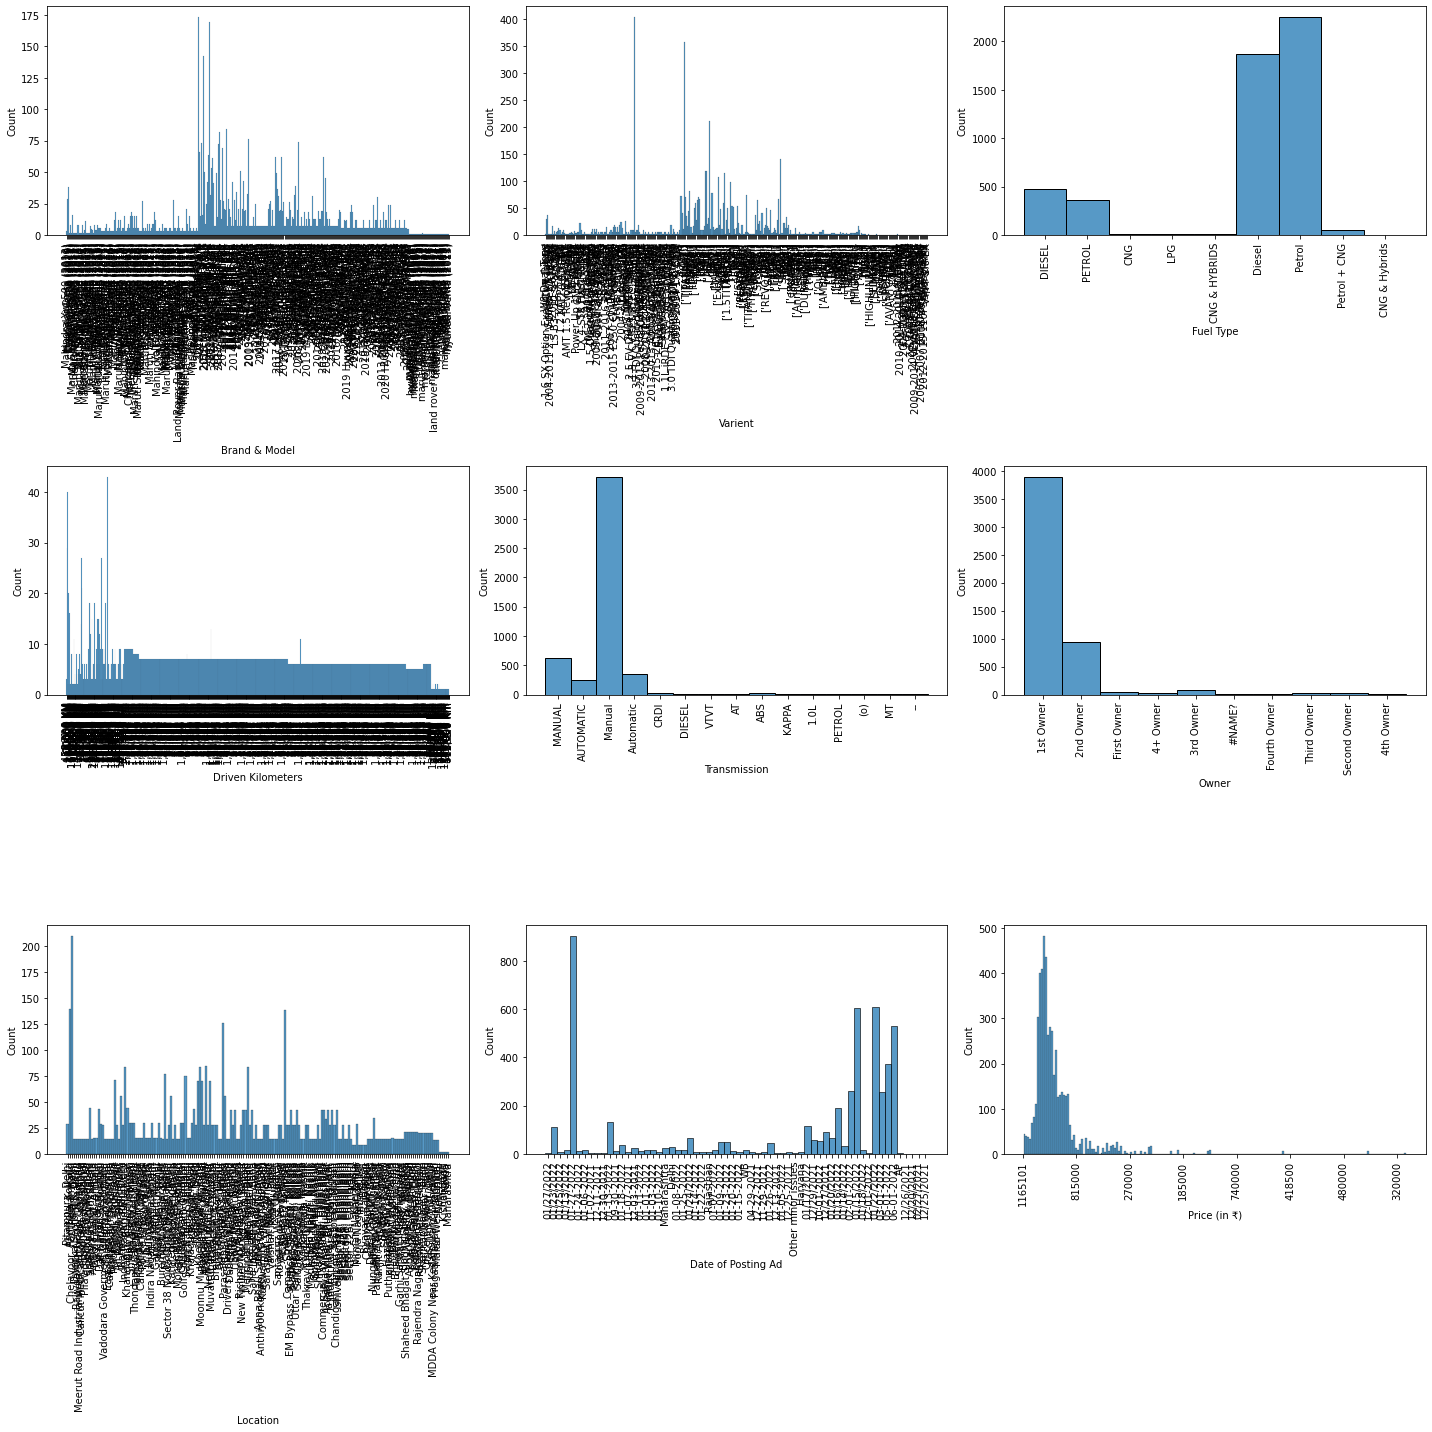

In [13]:
collist=data.columns.values
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(3,3,i+1)
    sns.histplot(data=data[collist[i]],palette='autumn').set_xticklabels(labels=data[collist[i]].unique(),rotation=90)
    plt.tight_layout()

# Observations

Brands, Varients, Driven Kilometers & Locationcolumns have high no of values.

Maximum Cars run on either Petrol or diesel. Only few goes for CNG and other fuels.

Maximum Cars have Manual transnission.

Maximum cars are being sold by their very 1st Owner.

We have collected the cars posted online in last one month, from 25th December 2021 to 27th January 2022.

Almost all the cars have a price rnging in between 270000 to 1165101.

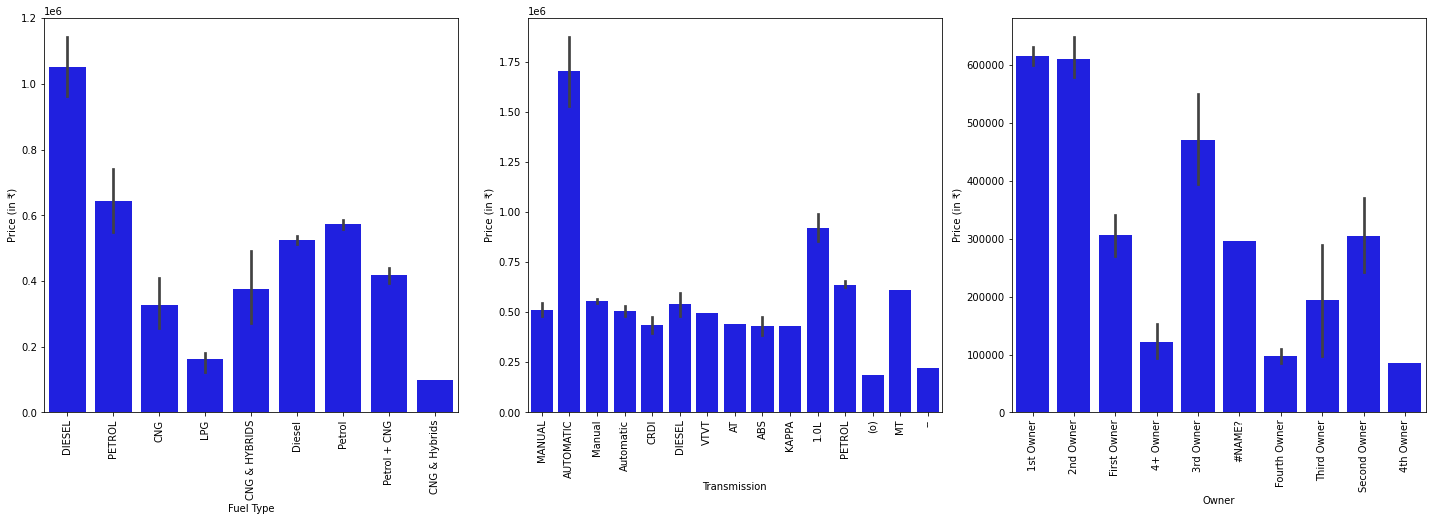

In [14]:
newcollist=['Fuel Type','Transmission','Owner']
plt.figure(figsize=(20,20))
for i in enumerate(newcollist):
    plt.subplot(3,3,i[0]+1)
    sns.barplot(data=data,x=i[1],y='Price (in ₹)',color='blue')
    plt.xticks(rotation=90)
    plt.tight_layout()


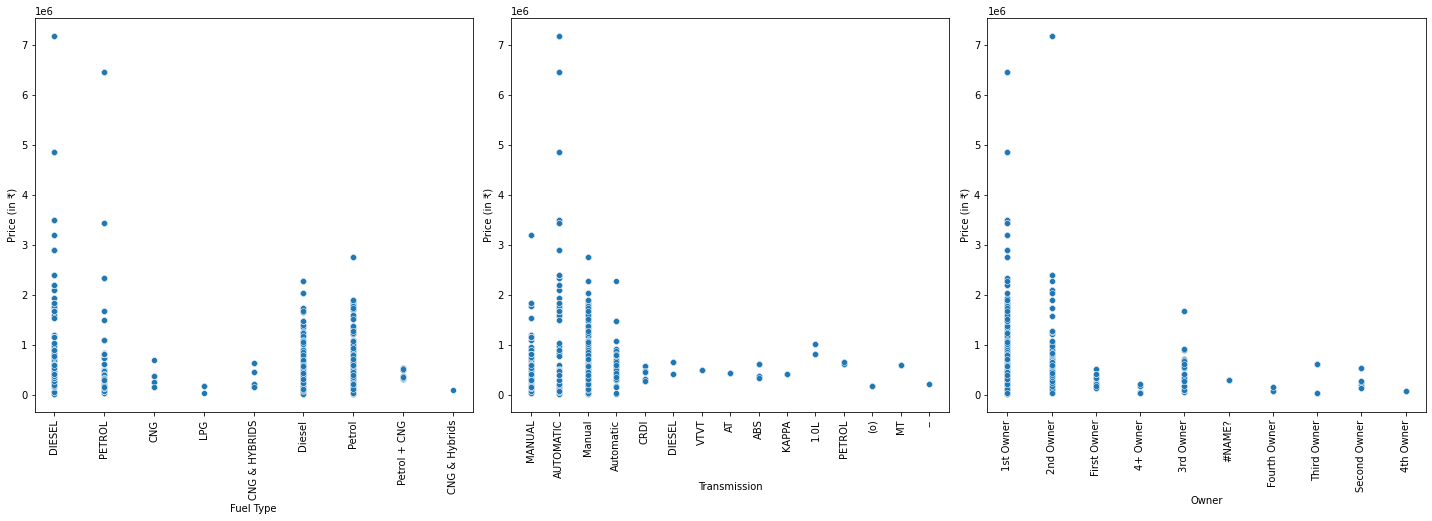

In [15]:
newcollist=['Fuel Type','Transmission','Owner']
plt.figure(figsize=(20,20))
for i in enumerate(newcollist):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(data=data,x=i[1],y='Price (in ₹)')
    plt.xticks(rotation=90)
    plt.tight_layout()

In [ ]:
Both bar graph and scatterplot shows that Price range is likely to be high for cars using Diesel as fuel, or having Automatic Transmission or is owned by only 1 Owner.



# Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in data.drop(['Price (in ₹)'],axis=1).columns:
    data[column]=le.fit_transform(data[column])
data    

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
0,266,143,3,543,10,1,123,31,435000
1,243,22,3,419,10,1,2,28,1165101
2,255,130,6,159,10,2,33,30,815000
3,226,79,6,80,10,1,115,20,270000
4,246,121,6,656,10,1,42,20,185000
...,...,...,...,...,...,...,...,...,...
5045,358,87,5,484,6,1,6,28,50000
5046,375,56,4,97,12,1,81,28,320000
5047,351,122,7,472,6,1,126,28,599000
5048,353,131,7,586,12,1,87,31,395000


We have successfully encoded the categorical columns.

In [17]:
# Checking the correlation.

data.corr()

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
Brand & Model,1.000000,-0.549761,-0.103328,-0.012454,-0.409501,0.244979,-0.015031,-0.247280,0.164447
Varient,-0.549761,1.000000,0.232386,-0.055018,0.322436,-0.293263,0.028981,0.181717,-0.141752
Fuel Type,-0.103328,0.232386,1.000000,-0.173801,0.151421,-0.091137,-0.046087,0.073410,-0.095055
Driven Kilometers,-0.012454,-0.055018,-0.173801,1.000000,-0.045955,0.038275,0.031807,-0.015722,0.019880
Transmission,-0.409501,0.322436,0.151421,-0.045955,1.000000,-0.111978,-0.000938,0.192195,-0.262659
Owner,0.244979,-0.293263,-0.091137,0.038275,-0.111978,1.000000,0.037011,0.068787,-0.109540
Location,-0.015031,0.028981,-0.046087,0.031807,-0.000938,0.037011,1.000000,0.054421,-0.030871
Date of Posting Ad,-0.247280,0.181717,0.073410,-0.015722,0.192195,0.068787,0.054421,1.000000,-0.089048
Price (in ₹),0.164447,-0.141752,-0.095055,0.019880,-0.262659,-0.109540,-0.030871,-0.089048,1.000000


<AxesSubplot:>

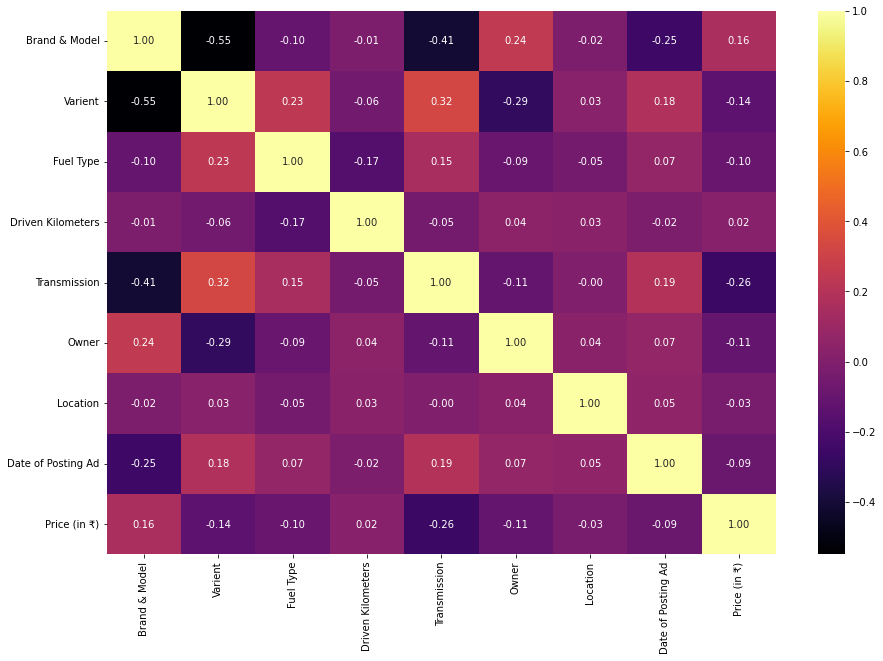

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap='inferno',fmt='0.2f',annot=True)

The dataset columns don't show any linear relationship with eachother that means data doesn't contain any multicolinearity. 

# Outlier Handling

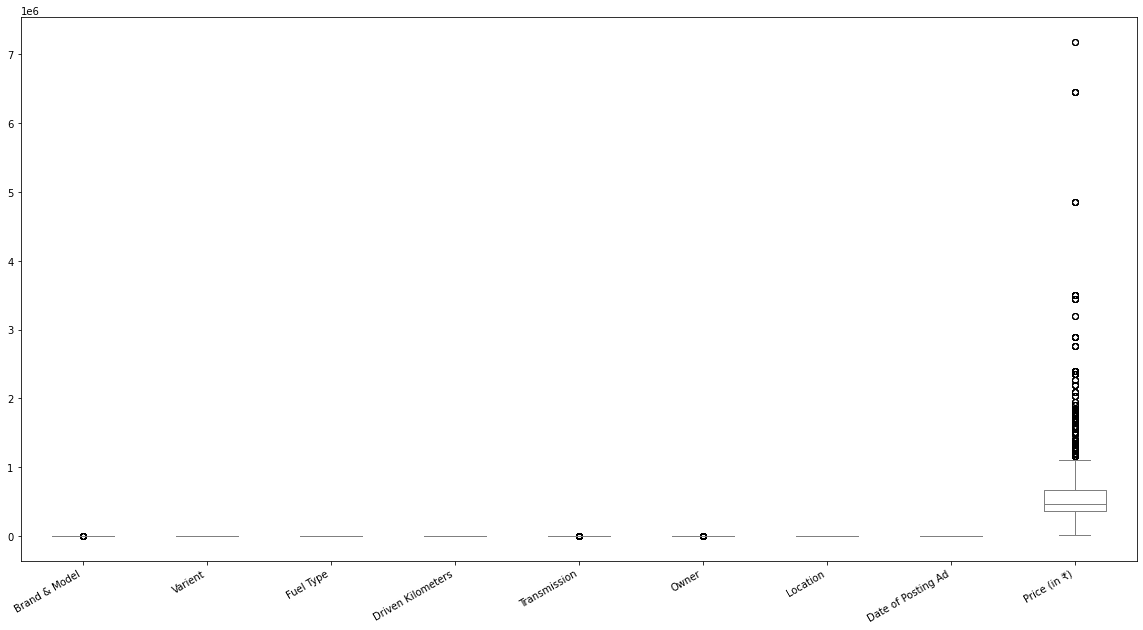

In [31]:
data.plot(kind='box',fontsize=10,figsize=(20,10),color='grey')
plt.xticks(rotation=30,ha='right')
plt.show()

Here only Target column shows outliers,we will not treat them as it is a dependent and target column.

In [29]:
# Checking skewness

data.skew().sort_values(ascending=False)

Price (in ₹)          5.321880
Owner                 4.912950
Brand & Model         0.671196
Date of Posting Ad    0.515359
Location              0.018320
Driven Kilometers     0.004722
Fuel Type            -0.237343
Varient              -0.615368
Transmission         -1.958222
dtype: float64

We can see skewness in Price,Owner, Brand & Model columns and we will handle it with power transform('yeo-johnson') method.


In [30]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [32]:
data[['Price (in ₹)','Owner','Brand & Model']]=scaler.fit_transform(data[['Price (in ₹)','Owner','Brand & Model']].values)

In [33]:
data.skew().sort_values(ascending=False)

Date of Posting Ad    0.515359
Price (in ₹)          0.029535
Location              0.018320
Driven Kilometers     0.004722
Brand & Model        -0.087666
Fuel Type            -0.237343
Varient              -0.615368
Owner                -0.898623
Transmission         -1.958222
dtype: float64

Here we have successfully handle the skewness.

# Seperating the dataset into features and columns

In [35]:
x= data.drop(['Price (in ₹)'],axis=1)
y=data['Price (in ₹)']

In [36]:
x.shape

(5050, 8)

In [37]:
y.shape

(5050,)

In [38]:
x

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad
0,1.347940,143,3,543,10,-0.443939,123,31
1,1.169326,22,3,419,10,-0.443939,2,28
2,1.263570,130,6,159,10,1.413780,33,30
3,1.031536,79,6,80,10,-0.443939,115,20
4,1.193111,121,6,656,10,-0.443939,42,20
...,...,...,...,...,...,...,...,...
5045,1.991738,87,5,484,6,-0.443939,6,28
5046,2.100757,56,4,97,12,-0.443939,81,28
5047,1.946059,122,7,472,6,-0.443939,126,28
5048,1.959159,131,7,586,12,-0.443939,87,31


In [39]:
y

0      -0.221720
1       1.422683
2       0.818167
3      -0.993177
4      -1.593632
          ...   
5045   -3.598136
5046   -0.720158
5047    0.304660
5048   -0.379024
5049    0.251297
Name: Price (in ₹), Length: 5050, dtype: float64

# Model Building and Evaluation

In [40]:
# Importing Necessary libraries.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [45]:
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [42]:
# Concluding the best Random_state for test_size 0.20.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

maxAccu=0
maxRS=0
for i in range(0,200): 
    x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=0.2,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(x_train, y_train)
    pred_rf=rf.predict(x_test)
    acc=r2_score(y_test,pred_rf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)

R2 Score= 0.8911512117333585 Random_State 47


# Spliting dataset into train and test with random state 47

In [43]:
x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=0.2,random_state=47)

# Linear Regression

In [46]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
rmse = mean_squared_error(y_test, lr_pred, squared=False)
print("Root Mean Square Error is:", rmse)
# R2 score
r2 = r2_score(y_test, lr_pred)*100
print("R2 Score is:", r2)
cv_score = (cross_val_score(lr, x, y, cv=10).mean())*100
print("Cross Validation Score is:", cv_score)
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

Root Mean Square Error is: 0.9840529916531544
R2 Score is: 7.114242018243278
Cross Validation Score is: -5.359301779835525
R2 Score - Cross Validation Score is 12.473543798078804


# Support Vector Regressor

In [47]:
svr=SVR()

# Model Fitting
svr.fit(x_train,y_train)
svr_pred=svr.predict(x_test)

# Root Mean square Error
rmse = mean_squared_error(y_test, svr_pred, squared=False)
print("Root Mean Square Error is:", rmse)

# R2 score
r2 = r2_score(y_test, svr_pred)*100
print("R2 Score is:", r2)

# Cross validation Score
cv_score = (cross_val_score(svr, x, y, cv=10).mean())*100
print("Cross Validation Score is:", cv_score)

# Difference Between Cross validation score and r2_score.
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result) 

Root Mean Square Error is: 1.0002900708709805
R2 Score is: 4.023684546080231
Cross Validation Score is: -0.6200078310752921
R2 Score - Cross Validation Score is 4.643692377155523


# Random Forest Regressor

In [48]:
rf=RandomForestRegressor()

# Model Fitting
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

# Root Mean square Error
rmse = mean_squared_error(y_test, rf_pred, squared=False)
print("Root Mean Square Error is:", rmse)

# R2 score
r2 = r2_score(y_test, rf_pred)*100
print("R2 Score is:", r2)

# Cross validation Score
cv_score = (cross_val_score(rf, x, y, cv=10).mean())*100
print("Cross Validation Score is:", cv_score)

# Difference Between Cross validation score and r2_score.
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result) 

Root Mean Square Error is: 0.3431744122917747
R2 Score is: 88.7035507737178
Cross Validation Score is: 78.49945511916061
R2 Score - Cross Validation Score is 10.204095654557179


# SGDRegressor

In [49]:
sgd=SGDRegressor()

# Model Fitting
sgd.fit(x_train,y_train)
sgd_pred=sgd.predict(x_test)

# Root Mean square Error
rmse = mean_squared_error(y_test, sgd_pred, squared=False)
print("Root Mean Square Error is:", rmse)

# R2 score
r2 = r2_score(y_test, sgd_pred)*100
print("R2 Score is:", r2)

# Cross validation Score
cv_score = (cross_val_score(sgd, x, y, cv=10).mean())*100
print("Cross Validation Score is:", cv_score)

# Difference Between Cross validation score and r2_score.
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result) 

Root Mean Square Error is: 63776250682788.29
R2 Score is: -3.901486653937106e+29
Cross Validation Score is: -2.308535653753209e+29
R2 Score - Cross Validation Score is -1.592951000183897e+29


# ExtraTreesRegressor

In [50]:
ext=ExtraTreesRegressor()

# Model Fitting
ext.fit(x_train,y_train)
ext_pred=ext.predict(x_test)

# Root Mean square Error
rmse = mean_squared_error(y_test, ext_pred, squared=False)
print("Root Mean Square Error is:", rmse)

# R2 score
r2 = r2_score(y_test, ext_pred)*100
print("R2 Score is:", r2)

# Cross validation Score
cv_score = (cross_val_score(ext, x, y, cv=10).mean())*100
print("Cross Validation Score is:", cv_score)

# Difference Between Cross validation score and r2_score.
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result) 

Root Mean Square Error is: 0.339991211503133
R2 Score is: 88.91214495812933
Cross Validation Score is: 77.71774043751893
R2 Score - Cross Validation Score is 11.194404520610405


# AdaBoostRegressor

In [51]:
adb=AdaBoostRegressor()

# Model Fitting
adb.fit(x_train,y_train)
adb_pred=adb.predict(x_test)

# Root Mean square Error
rmse = mean_squared_error(y_test, adb_pred, squared=False)
print("Root Mean Square Error is:", rmse)

# R2 score
r2 = r2_score(y_test, adb_pred)*100
print("R2 Score is:", r2)

# Cross validation Score
cv_score = (cross_val_score(adb, x, y, cv=10).mean())*100
print("Cross Validation Score is:", cv_score)

# Difference Between Cross validation score and r2_score.
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result) 

Root Mean Square Error is: 0.8411235585387967
R2 Score is: 32.13720359304142
Cross Validation Score is: 11.847079641121757
R2 Score - Cross Validation Score is 20.29012395191966


# GradientBoostingRegressor

In [52]:
gb=GradientBoostingRegressor()

# Model Fitting
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)

# Root Mean square Error
rmse = mean_squared_error(y_test, gb_pred, squared=False)
print("Root Mean Square Error is:", rmse)

# R2 score
r2 = r2_score(y_test, gb_pred)*100
print("R2 Score is:", r2)

# Cross validation Score
cv_score = (cross_val_score(gb, x, y, cv=10).mean())*100
print("Cross Validation Score is:", cv_score)

# Difference Between Cross validation score and r2_score.
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result) 

Root Mean Square Error is: 0.7116219653157368
R2 Score is: 51.42521947103863
Cross Validation Score is: 31.08185824761606
R2 Score - Cross Validation Score is 20.34336122342257


From all above models, the RandomForest Regressor gives the best results as the difference between R2 Score & Cross Validation Score are least along with highest r2 score and cross validation score,so we are finalizing RandomForest Regressor.

# Hyper Parameter Tunning

In [54]:
# Hyper Parameter Tunning using RandomisedSearchCV for randomForestRegressor.
params={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200,300]}

In [56]:
from sklearn.model_selection import RandomizedSearchCV


rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=47, n_jobs = -1)

In [57]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=47, verbose=2)

In [62]:
# Getting the best parameters.
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [66]:
final_model=RandomForestRegressor(n_estimators= 100, min_samples_split= 2, min_samples_leaf= 1, max_features='sqrt', max_depth=40, bootstrap= False)

In [67]:
best_fit = final_model.fit(x_train,y_train) 

In [68]:
best_pred=final_model.predict(x_test)

In [69]:
# Root Mean square Error
rmse = mean_squared_error(y_test, best_pred, squared=False)
print("Root Mean Square Error is:", rmse)

# R2 score
r2 = r2_score(y_test, best_pred)*100
print("R2 Score is:", r2)

# Cross validation Score
cv_score = (cross_val_score(final_model, x, y, cv=10).mean())*100
print("Cross Validation Score is:", cv_score)

Root Mean Square Error is: 0.3324822575161675
R2 Score is: 89.3965032683592
Cross Validation Score is: 75.71723324339675


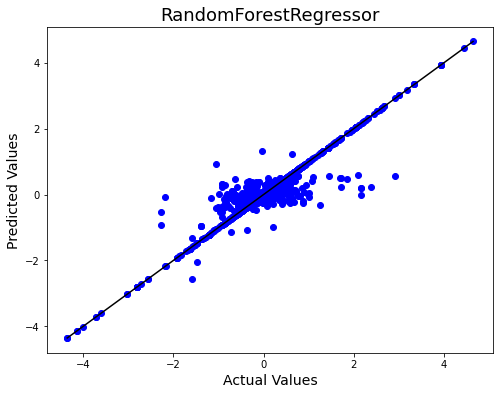

In [70]:
# Visualizing Best fit line.
plt.figure(figsize=(8,6))
plt.scatter(y_test, best_pred, color='b')
plt1 = max(max(best_pred), max(y_test))
plt2 = min(min(best_pred), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'black')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('RandomForestRegressor',fontsize=18)
plt.show()

Here after hyper parameter tunning we can see most of the datapoints are close to best fit line and we got the final r2 score as 89% which very good.

# Saving The Model

In [73]:
import pickle
filename = 'Car_Price_Prediction.pkl'
pickle.dump(final_model,open(filename,'wb'))